# Enter your Details Here:

In [ ]:
Num, Name, Week = input("Reg. Number:"), input("Name:"), input("Week:")

### 1.Import the libraries

In [1]:
import numpy as np

### 2. Import the dataset

In [ ]:
X_train = np.array([
    [2, 1, 3, 0, 0, 1],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 2, 0, 1, 0],
    [0, 1, 0, 2, 1, 1],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 0, 2, 2, 0]
])
y_train = np.array(['Terrorism', 'Terrorism', 'Terrorism', 'Entertainment', 'Entertainment', 'Entertainment'])


### 3.Display the dataset information

In [ ]:
X_train

array([[2, 1, 3, 0, 0, 1],
       [1, 1, 1, 0, 0, 0],
       [1, 1, 2, 0, 1, 0],
       [0, 1, 0, 2, 1, 1],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 2, 2, 0]])

In [ ]:
y_train

array(['Terrorism', 'Terrorism', 'Terrorism', 'Entertainment',
       'Entertainment', 'Entertainment'], dtype='<U13')

In [ ]:
class_labels = np.unique(y_train)

In [ ]:
class_labels

array(['Entertainment', 'Terrorism'], dtype='<U13')

In [ ]:
# Prior probabilities
prior_prob = {}
for label in class_labels:
    prior_prob[label] = np.sum(y_train == label) / len(y_train)

In [ ]:
prior_prob

{'Entertainment': 0.5, 'Terrorism': 0.5}

In [ ]:
# Conditional probabilities
conditional_prob = {}
for label in class_labels:
    conditional_prob[label] = np.round((X_train[y_train == label].sum(axis=0) + 1) / (np.sum(X_train[y_train == label]) + X_train.shape[1]),4)

In [ ]:
conditional_prob

{'Entertainment': array([0.0556, 0.1111, 0.1111, 0.3333, 0.2778, 0.1111]),
 'Terrorism': array([0.2381, 0.1905, 0.3333, 0.0476, 0.0952, 0.0952])}

In [ ]:
X_test = np.array([[1, 1, 1, 1, 1, 1]])

In [ ]:
def predict(X):
    predictions = []
    for i in range(X.shape[0]):
        probs = {}
        for label in class_labels:
            likelihood = np.prod(conditional_prob[label] ** X[i]) * prior_prob[label]
            probs[label] = likelihood
        prediction = max(probs, key=probs.get)
        predictions.append(prediction)
    return predictions

In [ ]:
predicted_class = predict(X_test)
print("Predicted class:", predicted_class[0])

Predicted class: Entertainment


### 4.Drop the unnecessary columns from both `Train` and `Test` datasets

### 5. Hanlde the misssing data

### 6. Encode the categorical data

### 7.Split the Train & Test datasets

### 8. Do Feature Scaling if required

### 9. Apply dimensionality reduction if required

### 10. Train the required model

### 11. Check the Model Performance()

### 12. Fine tune the model if required.

### 13. Write Down your inferences.

# For uploading you need to execute the follwing script

In [ ]:
from google.colab import auth
auth.authenticate_user()
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
user = gcloud_tokeninfo['email']
import datetime
dt = datetime.datetime.now()
x = str(dt).split('.')[0]
print(f"This Script is executed by: ",user, "at", x)

This Script is executed by:  tulasiprasad.sariki@vit.ac.in at 2024-01-09 04:26:22


##SMS Spam Classification

In [4]:
import nltk
import pandas as pd

In [2]:
import requests
import zipfile
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
data_file = 'SMSSpamCollection'

# Make request
resp = requests.get(url)

# Get filename
filename = url.split('/')[-1]

# Download zipfile
with open(filename, 'wb') as f:
  f.write(resp.content)

# Extract Zip
with zipfile.ZipFile(filename, 'r') as zip:
  zip.extractall('')

# Read Dataset
data = pd.read_table(data_file,
                     header = 0,
                     names = ['type', 'message']
                     )

# Show dataset
data.head()

,type,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
# data = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [5]:
data.head()

,type,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


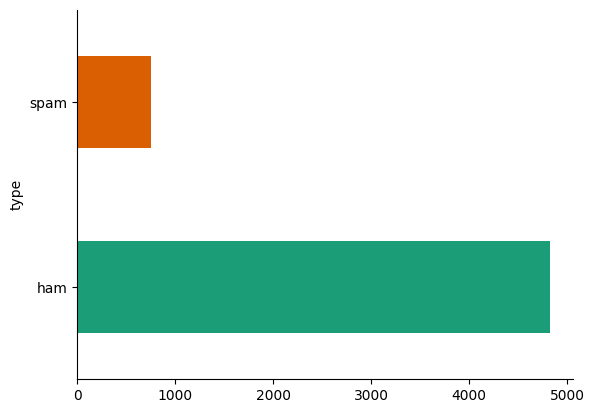

In [7]:
# @title Bar Graph of Type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def preprocess_text(message):
    tokens = message.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

data['message'] = data['message'].apply(preprocess_text)


In [10]:
data.head()

,type,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
2,ham,U dun say early hor... U c already say...
3,ham,"Nah think goes usf, lives around though"
4,spam,FreeMsg Hey darling 3 week's word back! I'd li...


In [11]:
def lowercase_text(message):
    return message.lower()
data['message'] = data['message'].apply(lowercase_text)

In [12]:
data.head()

,type,message
0,ham,ok lar... joking wif u oni...
1,spam,free entry 2 wkly comp win fa cup final tkts 2...
2,ham,u dun say early hor... u c already say...
3,ham,"nah think goes usf, lives around though"
4,spam,freemsg hey darling 3 week's word back! i'd li...


In [13]:
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
def stem_text(message):
    stemmer = PorterStemmer()
    tokens = nltk.word_tokenize(message)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

data['message'] = data['message'].apply(stem_text)

In [17]:
data.head()

,type,message
0,ham,ok lar ... joke wif u oni ...
1,spam,free entri 2 wkli comp win fa cup final tkt 21...
2,ham,u dun say earli hor ... u c alreadi say ...
3,ham,"nah think goe usf , live around though"
4,spam,freemsg hey darl 3 week 's word back ! i 'd li...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['message'])

In [20]:
X

<5571x7439 sparse matrix of type '<class 'numpy.int64'>'
	with 50113 stored elements in Compressed Sparse Row format>

In [21]:
y = data['type']

In [22]:
from sklearn.model_selection import train_test_split

# Assuming your feature matrix is in 'X' and labels are in a variable 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train_arr = X_train.toarray()
# y_train_arr = y_train.toarray()

In [24]:
from sklearn.naive_bayes import GaussianNB

# Create the model
model = GaussianNB()

# Fit (train) the model
model.fit(X_train.toarray(), y_train)

GaussianNB()

In [25]:
y_pred = model.predict(X_test.toarray())

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8816143497757848
Confusion Matrix:
 [[838 117]
 [ 15 145]]


In [26]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)  # No need to convert to a dense matrix


MultinomialNB()

In [27]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9811659192825112
Confusion Matrix:
 [[943  12]
 [  9 151]]


In [28]:
from sklearn.naive_bayes import BernoulliNB

In [29]:
model = BernoulliNB()

# 4. Fit the Model
model.fit(X_train, y_train)

# 5. Evaluation: Predictions
y_pred_train = model.predict(X_train_arr)
y_pred_test = model.predict(X_test.toarray())

# 6. Evaluation: Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

# 7. Evaluation: Confusion Matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("Training Confusion Matrix:\n", cm_train)
print("Testing Confusion Matrix:\n", cm_test)

Training Accuracy: 0.9865350089766607
Testing Accuracy: 0.9739910313901345
Training Confusion Matrix:
 [[3868    1]
 [  59  528]]
Testing Confusion Matrix:
 [[951   4]
 [ 25 135]]
